## Description

In [1]:
# Dataset: From ：The first line of data from top400seq.txt.
#          Size ：679 numbers of float
#          Desc ：Every number represents the time of every company's being acquired Sequentially.
#          FYI  ：https://github.com/wangxiaodui/wanglianxiao/blob/master/top400seq.txt

In [2]:
# Motivation: Predict the time of the next company to be acquired

In [3]:
# Tools: keras ：build and train model
#        numpy ：process data as array
#        pandas ：Read data
#        matplotlib ：draw data graph

In [4]:
# Result: build a lstm model for the data with a loss of 8.2519e-06

## Experiment

### 1. read and process data

In [5]:
# load data
import pandas
dataset = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
print(dataset)

        0         1         2         3         4         5         6    \
0  0.046575  0.654795  1.035616  1.254795  1.345205  1.731507  2.134247   

        7         8         9      ...            669        670        671  \
0  2.139726  2.161644  2.210959    ...      14.194521  14.219178  14.232877   

         672        673        674        675        676        677        678  
0  14.254795  14.254795  14.254795  14.254795  14.254795  14.254795  14.257534  

[1 rows x 679 columns]


In [6]:
# change Pandas dataframe to NumPy array for better processing
import numpy
dataset =numpy.array(dataset)
print(dataset.shape)

(1, 679)


In [7]:
# reshape data
dataset=numpy.reshape(dataset,(679,1),)
print(dataset.shape)

(679, 1)


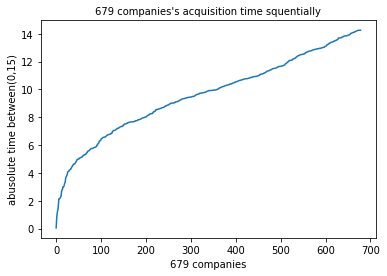

In [8]:
# The dataset looks like this
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.title("679 companies's acquisition time squentially",fontsize = 10)
plt.xlabel("679 companies")
plt.ylabel("abusolute time between(0,15)")
plt.show()

In [9]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [10]:
# normalize the dataset making all the numbers to between[0,1] for better processing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets of 67%(454) and 33%(225)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(train.shape)

454 225
(454, 1)


In [12]:
# predit next acquisition time with this acquisition time 
# so define a function convert an array of values into a dataset matrix with X=t and Y=t+1
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape train and test datasets into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX),len(trainY))
print(len(testX),len(testY))

452 452
223 223


In [14]:
# reshape input as LSTM network expected to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)

(452, 1, 1)


### 2. create and fit the LSTM network

In [15]:
# Sequential is a linear stack of multiple network layers
# Dense is full connection layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [16]:
# here is a visible layer with 1 input
# a hidden layer with 4 LSTM neurons
# an output layer that makes a single value prediction. 
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))

In [17]:
# compile function configures the learning process.
# set the loss function, optimizer and the default sigmoid activation function.
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
# fit function trains the model for a fixed number of epochs.
# the network is trained for 100 epochs and a batch size of 1 is used.
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
5s - loss: 0.0629
Epoch 2/100
4s - loss: 0.0074
Epoch 3/100
6s - loss: 0.0048
Epoch 4/100
5s - loss: 0.0025
Epoch 5/100
5s - loss: 0.0010
Epoch 6/100
6s - loss: 2.7149e-04
Epoch 7/100
5s - loss: 5.7670e-05
Epoch 8/100
5s - loss: 2.3361e-05
Epoch 9/100
4s - loss: 2.0182e-05
Epoch 10/100
5s - loss: 1.9439e-05
Epoch 11/100
5s - loss: 1.8550e-05
Epoch 12/100
5s - loss: 1.6289e-05
Epoch 13/100
5s - loss: 1.5438e-05
Epoch 14/100
5s - loss: 1.4020e-05
Epoch 15/100
5s - loss: 1.3321e-05
Epoch 16/100
4s - loss: 1.1420e-05
Epoch 17/100
4s - loss: 1.0874e-05
Epoch 18/100
4s - loss: 9.1508e-06
Epoch 19/100
4s - loss: 9.6869e-06
Epoch 20/100
5s - loss: 8.7292e-06
Epoch 21/100
5s - loss: 9.4048e-06
Epoch 22/100
5s - loss: 8.0077e-06
Epoch 23/100
4s - loss: 8.3755e-06
Epoch 24/100
5s - loss: 8.7116e-06
Epoch 25/100
4s - loss: 8.0219e-06
Epoch 26/100
4s - loss: 9.0542e-06
Epoch 27/100
4s - loss: 8.9590e-06
Epoch 28/100
4s - loss: 9.1557e-06
Epoch 29/100
4s - loss: 7.7208e-06
Epoch 30/100
4

### 3. estimate the performance

In [19]:
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions[0,1] to the same units as the original data[0,14.*]
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# We can see that the model nearly has no error on the training dataset
# and an average error of about 0.01 years on the test dataset. Good.

Train Score: 0.03 RMSE
Test Score: 0.13 RMSE


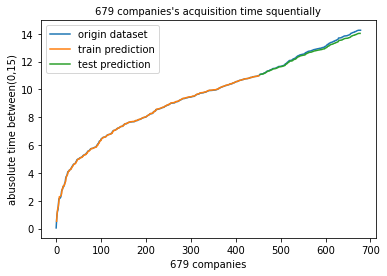

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="origin dataset")
plt.plot(trainPredictPlot,label="train prediction")
plt.plot(testPredictPlot,label="test prediction")
plt.title("679 companies's acquisition time squentially",fontsize = 10)
plt.xlabel("679 companies")
plt.ylabel("abusolute time between(0,15)")
plt.legend()
plt.show()